In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Student_performance.csv")

In [3]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [5]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [6]:
x_train = df.sample(frac=0.8, random_state=42)
x_test = df.drop(x_train.index)
y_train = x_train.pop("Performance Index").values
y_test = x_test.pop("Performance Index").values

In [7]:
x_train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6


In [8]:
y_train

array([51., 20., 46., ..., 36., 90., 46.])

In [9]:
def normal_elements(x):
    meu = np.mean(x, axis = 0)
    max = np.max(x, axis = 0)
    min = np.min(x, axis = 0)
    return meu, max, min

In [28]:
def normalisation(x, meu, max, min):
    n_x = (x - meu)/(max - min)
    return n_x

In [11]:
def initialising_para(x):
    m , n = x.shape
    w = np.zeros(n,)
    b = 0
    return w, b

In [29]:
def cost_funtion(w,b, x, y):
    m, n = x.shape
    y_hat = np.dot(x, w) + b
    cost = np.sum(np.square(y - y_hat))
    cost /= (2*m)
    return cost

In [13]:
def derivatives(x, w, b, y):
    m, n = x.shape
    y_hat = np.dot(x, w) + b 
    error = y_hat - y
    dj_dw = (np.dot(x.T, error)) / m
    dj_db = np.sum(error) / m

    return dj_dw, dj_db

In [14]:
def update_para(w, b, x, y, alpha):
    dj_dw, dj_db = derivatives(x, w, b, y) 
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    return w, b

In [15]:
num_iters = 700
meu, max, min = normal_elements(x_train)
normal_x_train = normalisation(x_train, meu, max, min)
w, b = initialising_para(x_train)
j_his = []
alpha = 0.1
for i in range(num_iters):
    w, b = update_para(w, b, normal_x_train, y_train, alpha)
    j = cost_funtion(w, b, normal_x_train, y_train)
    if (i % 100 == 0):
        print(f"iteration {i}: cost {j}")
    j_his.append(j)

iteration 0: cost 1416.395727137026
iteration 100: cost 32.682469376012726
iteration 200: cost 7.37744578613244
iteration 300: cost 2.9986649737910493
iteration 400: cost 2.2347693669858253
iteration 500: cost 2.100759266391944
iteration 600: cost 2.077160393245953


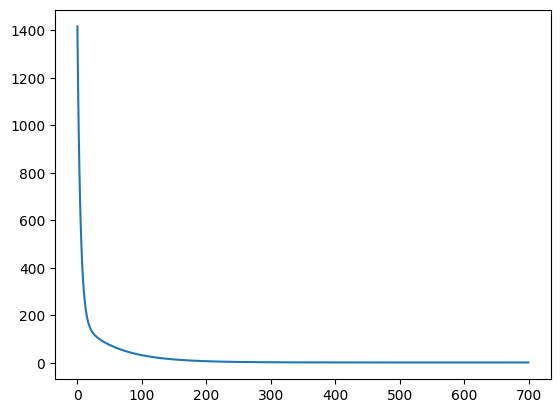

In [26]:
plt.plot(np.arange(num_iters), j_his)
plt.show()

In [19]:
normal_x_test = normalisation(x_test, meu, max, min)
y_hat_test = np.dot(normal_x_test, w) + b
test_err = y_hat_test - y_test


In [20]:
print(np.min(test_err))
print(np.max(test_err))
print(np.mean(test_err))
print(np.std(test_err))

-8.749851595244571
8.59435219271515
-0.07083679286430757
2.0443573552279806


In [23]:
gr2_test = np.sum(np.square(y_test - y_hat_test))
yr2_test = np.sum(np.square(y_test - np.mean(y_test)))
1 - (gr2_test / yr2_test)

0.9888170269330329

In [24]:
y_hat_train = np.dot(normal_x_train, w) + b

In [25]:
gr2_train = np.sum(np.square(y_train - y_hat_train))
yr2_train = np.sum(np.square(y_train - np.mean(y_train)))
1 - (gr2_train / yr2_train)

0.98872787925038